In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally, 设置坐标轴线宽
import seaborn as sns
sns.set()  # 使用seaborn设置绘图风格

在notebook中启动静态图片

In [2]:
%matplotlib inline 

### 1. 直接plot
仅输入y轴的值，x轴从0开始自动补全

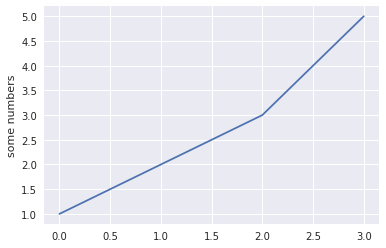

In [3]:
plt.plot([1, 2, 3, 5])  # y轴
plt.ylabel('some numbers')
plt.show()

前面的数组是x，后面的数组是y

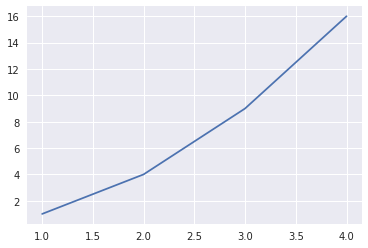

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### 2. 设置画图的格式
plot接受第三个参数，用来设置点的颜色和样式

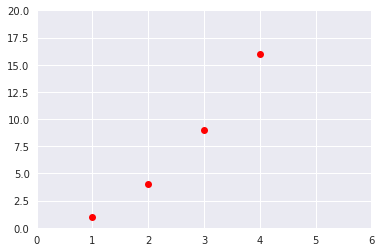

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')  # ro表示红色，点状
plt.axis([0, 6, 0, 20])  # axis用来指定坐标范围，[xmin, xmax, ymin, ymax]
plt.show()

plot可以同时绘制多个序列

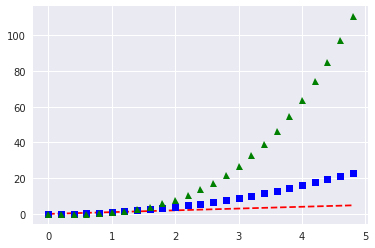

In [6]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
# 可以同时plot多个序列
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### 3. Plotting with keyword strings

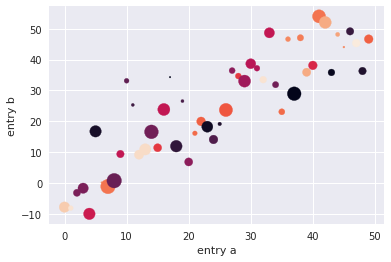

In [7]:
# 数据使用一个字典表示，每个元素的长度相等
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# 散点图，c表示color, s表示size
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### 4. Plotting with categorical variables(类型变量、分类变量)
先类型，后各类型对应的值

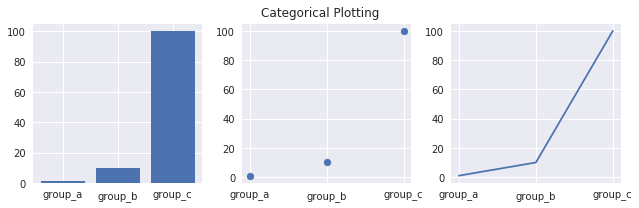

In [26]:
names = ['group_a', 'group_b', 'group_c']  # 不同分类的名称
values = [1, 10, 100]  # 不同分类对应的值

plt.figure(1, figsize=(9, 3))  # 设置图片大小

plt.subplot(131)  # 1x3, 第一个子图
plt.bar(names, values)  # 柱状图
plt.subplot(132)  # 1x3, 第二个子图
plt.scatter(names, values)  # 散点图
plt.subplot(133)  # 1x3, 第三个子图
plt.plot(names, values)  # 折线图
plt.suptitle('Categorical Plotting')  # 图片的标题
# w_pad设置子图之间的间隔宽度;rect设置整个图像部分（矩形）的左上点坐标和右下点坐标，默认值为[0, 0, 1, 1]
plt.tight_layout(w_pad=0.1, rect=[0, 0.03, 1, 0.95]) 
plt.savefig('demo1.png', dpi=200)  # 保存图片

### 5. Working with multiple figures and axes(多图，多坐标轴)

MATLAB, and pyplot, have the concept of the current figure and the current axes(当前图像和当前坐标轴). All plotting commands apply to the current axes. The function `gca()` returns the current axes (a matplotlib.axes.Axes instance), and `gcf()` returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

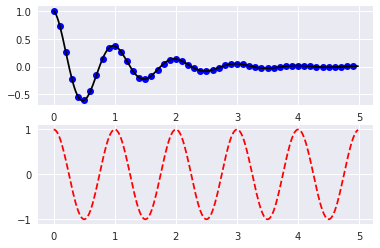

In [9]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

"""
The figure() command here is optional because figure(1) will be created by default, 
just as a subplot(111) will be created by default if you don’t manually specify any axes. 
The subplot() command specifies numrows, numcols(子图中的行数和列数), 
fignum where fignum ranges from 1 to numrows*numcols. 
The commas in the subplot command are optional if numrows*numcols<10. 
So subplot(211) is identical to subplot(2, 1, 1).
"""

plt.figure(1)  # 创建一个图像实例
plt.subplot(211)  # 两行一列，第一个子图
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

You can create multiple figures by using multiple `figure()` calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires(子图的数量没有限制):

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1, 2, 3')

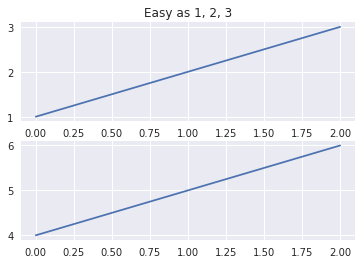

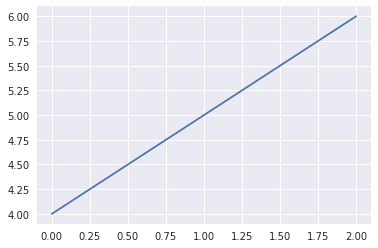

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

# 返回到figure 1的第一个子图
plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

### close 画图实例，释放内存

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because **pyplot maintains internal references until `close()` is called**.

#### matplotlib.pyplot.close

`matplotlib.pyplot.close(*args)`

Close a figure window.

`close()` by itself closes the current figure

`close(h)` where h is a Figure instance, closes that figure

`close(num)` closes figure number num

`close(name)` where name is a string, closes figure with that label

`close('all')` closes all the figure windows


### 6. 在图的任意位置添加文本

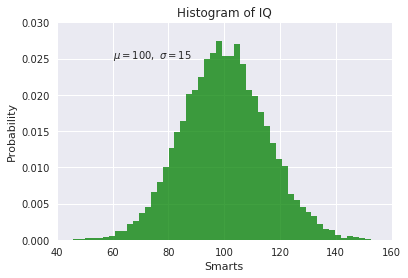

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')

# 前面是坐标位置，后面是文本，允许插入数学公式（TeX equation expressions）
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')  
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

#### 还可以设置text的属性
All of the `text()` commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using `setp()`:
```
t = plt.xlabel('my data', fontsize=14, color='red')
```

These properties are covered in more detail in Text properties and layout.
https://matplotlib.org/tutorials/text/text_props.html

#### 更多与数学公式相关：
https://matplotlib.org/tutorials/text/mathtext.html

### 7. 在图中添加注释

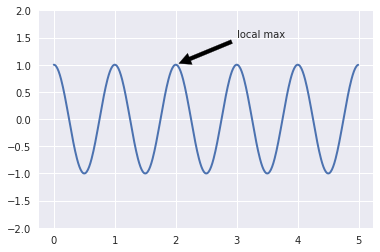

In [12]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

### 8. Logarithmic and other nonlinear axes(对数及非线性坐标轴)
`matplotlib.pyplot` supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:
```
plt.xscale(‘log’)
```
An example of four plots with the same data and different scales for the y axis is shown below.

<Figure size 432x288 with 0 Axes>

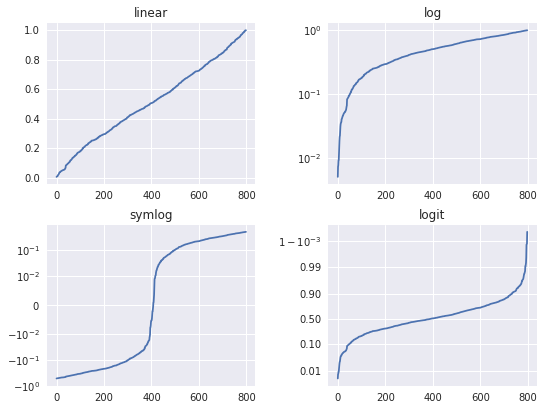

In [13]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)
plt.figure(figsize=(8,6))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()